<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
# Create a Ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")
# Print the ticker object to see available information
print(tesla_ticker)

yfinance.Ticker object <TSLA>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [7]:
# Create a Ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data for Tesla with the period set to max
tesla_data = tesla_ticker.history(period="max")

# Display the resulting DataFrame
print(tesla_data)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...                ...         ...         ...         ...        ...   
2023-11-06  223.979996  226.320007  215.000000  219.270004  117335800   
2023-11-07  219.979996  223.119995  215.720001  222.179993  116900100   
2023-11-08  223.149994  224.149994  217.639999  222.110001  106584800   
2023-11-09  219.750000  220.800003  206.679993  209.979996  142110500   
2023-11-10  210.029999  215.380005  205.690002  214.649994  130994000   

            Dividends  Stock Splits  
Date        

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
# Reset the index of tesla_data in place
tesla_data.reset_index(inplace=True)

# Display the first five rows of tesla_data
print(tesla_data.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [89]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as a variable named html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status Code: {response.status_code}")



Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [90]:
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content
# If you used the previous code, html_data is the response.text

# Parse the HTML data with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now, you can work with the parsed HTML using BeautifulSoup methods
# For example, you can print the title of the webpage
print("Webpage Title:", soup.title.text)

Webpage Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [91]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML data with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

tesla_revenue=pd.DataFrame(columns=["Date","revenue"])


# Use pandas read_html to extract the table into a DataFrame
tables = pd.read_html(html_data)

# Extract the second table (index 1) as it contains Tesla Revenue data
tesla_revenue = tables[1]

# Display the resulting DataFrame
print(tesla_revenue)


   Tesla Quarterly Revenue(Millions of US $)  \
0                                 2022-09-30   
1                                 2022-06-30   
2                                 2022-03-31   
3                                 2021-12-31   
4                                 2021-09-30   
5                                 2021-06-30   
6                                 2021-03-31   
7                                 2020-12-31   
8                                 2020-09-30   
9                                 2020-06-30   
10                                2020-03-31   
11                                2019-12-31   
12                                2019-09-30   
13                                2019-06-30   
14                                2019-03-31   
15                                2018-12-31   
16                                2018-09-30   
17                                2018-06-30   
18                                2018-03-31   
19                                2017-1

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [55]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


KeyError: 'Revenue'

In [57]:
tesla_revenue["Tesla Quarterly Revenue(Millions of US $)"] = tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'].str.replace('[\$,]', '', regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [53]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [60]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


   Tesla Quarterly Revenue(Millions of US $)  \
48                                2010-09-30   
49                                2010-06-30   
50                                2010-03-31   
52                                2009-09-30   
53                                2009-06-30   

   Tesla Quarterly Revenue(Millions of US $).1  
48                                         $31  
49                                         $28  
50                                         $21  
52                                         $46  
53                                         $27  


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [61]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Print the ticker object to see available information
print(gme_ticker)


yfinance.Ticker object <GME>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [62]:
# Extract historical stock data for GameStop with the period set to max
gme_data = gme_ticker.history(period="max")

# Display the resulting DataFrame
print(gme_data)


                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620129   1.693350   1.603296   1.691667  76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600        0.0   
2002-02-15   1.683250   1.687458   1.658002   1.674834   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615920   1.662209   1.603296   1.662209   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2023-11-06  13.990000  14.050000  13.490000  13.530000   2164400        0.0   
2023-11-07  13.470000  13.790000  13.230000  13.640000   2354400        0.0   
2023-11-08  13.510000  13.760000  13.280000  13.280000   1705600        0.0   
2023-11-09  13.250000  13.320000  12.700000  12.700000   2750100        0.0   
2023-11-10  12.810000  12.970000  12.350000  12.5400

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [63]:
# Reset the index of gme_data in place
gme_data.reset_index(inplace=True)

# Display the first five rows of gme_data
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662209  1.603296  1.662209   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [100]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as a variable named html_data
    html_data1 = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status Code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [101]:
from bs4 import BeautifulSoup

# Parse the HTML data with BeautifulSoup
soup = BeautifulSoup(html_data1, 'html.parser')

# Now, you can work with the parsed HTML using BeautifulSoup methods
# For example, you can print the title of the webpage
print("Webpage Title:", soup.title.text)


Webpage Title: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [102]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content
# If you used the previous code, html_data is the response.text

# Parse the HTML data with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Use pandas read_html to extract all tables into a list
tables = pd.read_html(html_data1)

# Print the number of tables found
print(f"Number of tables found: {len(tables)}")

# Loop through tables and print their structure
for i, table in enumerate(tables):
    print(f"\nTable {i + 1}:\n{table}")

# Extract the second table (index 1) as it contains GameStop Revenue data
gme_revenue = tables[1]

# Display the resulting DataFrame
print(gme_revenue)


Number of tables found: 6

Table 1:
    GameStop Annual Revenue(Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   
5                                        2015   
6                                        2014   
7                                        2013   
8                                        2012   
9                                        2011   
10                                       2010   
11                                       2009   
12                                       2008   
13                                       2007   
14                                       2006   
15                                       2005   

   GameStop Annual Revenue(Millions of US $).1  
0                                       $6,466  
1                               

In [103]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content
# If you used the previous code, html_data is the response.text

# Parse the HTML data with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the second tbody tag as it contains the table with GameStop Revenue
table_body = soup.find_all("tbody")[1]

# Extract rows and columns from the table
rows = table_body.find_all("tr")

# Initialize empty lists for data
dates = []
revenues = []

# Extract data from 'td' elements within each 'tr' element
for row in rows[1:]:  # Skip the header row
    columns = row.find_all("td")
    date = columns[0].text.strip()
    revenue = columns[1].text.strip().replace(',', '').replace('$', '')  # Remove commas and dollar signs
    dates.append(date)
    revenues.append(revenue)

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Display the resulting DataFrame
print(gme_revenue)


          Date Revenue
0   2022-06-30   16934
1   2022-03-31   18756
2   2021-12-31   17719
3   2021-09-30   13757
4   2021-06-30   11958
5   2021-03-31   10389
6   2020-12-31   10744
7   2020-09-30    8771
8   2020-06-30    6036
9   2020-03-31    5985
10  2019-12-31    7384
11  2019-09-30    6303
12  2019-06-30    6350
13  2019-03-31    4541
14  2018-12-31    7226
15  2018-09-30    6824
16  2018-06-30    4002
17  2018-03-31    3409
18  2017-12-31    3288
19  2017-09-30    2985
20  2017-06-30    2790
21  2017-03-31    2696
22  2016-12-31    2285
23  2016-09-30    2298
24  2016-06-30    1270
25  2016-03-31    1147
26  2015-12-31    1214
27  2015-09-30     937
28  2015-06-30     955
29  2015-03-31     940
30  2014-12-31     957
31  2014-09-30     852
32  2014-06-30     769
33  2014-03-31     621
34  2013-12-31     615
35  2013-09-30     431
36  2013-06-30     405
37  2013-03-31     562
38  2012-12-31     306
39  2012-09-30      50
40  2012-06-30      27
41  2012-03-31      30
42  2011-12

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [73]:
# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())

          Date Revenue
56  2006-01-31    1667
57  2005-10-31     534
58  2005-07-31     416
59  2005-04-30     475
60  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [ ]:
amd_share_price_data.plot(x="Date", y="Open")

[*********************100%***********************]  1 of 1 completed


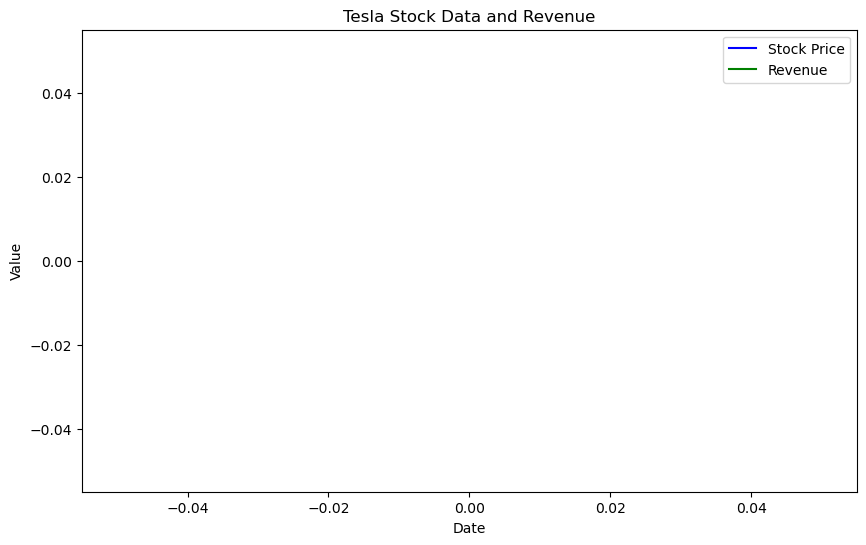

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the stock symbol for Tesla
tesla_symbol = "TSLA"

# Fetch historical stock data for Tesla
tesla_data = yf.download(tesla_symbol, start="2021-01-01", end="2021-06-30")

# Assuming you have updated tesla_revenue DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Assuming you have the make_graph function defined
def make_graph(stock_data, revenue_data, company_name):
    # Assuming stock_data and revenue_data are DataFrames with 'Date' and 'Close'/'Revenue' columns
    merged_data = pd.merge(stock_data, revenue_data, on='Date', how='inner')
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Date'], merged_data['Close'], label='Stock Price', color='blue')
    plt.plot(merged_data['Date'], merged_data['Revenue'], label='Revenue', color='green')
    
    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{company_name} Stock Data and Revenue')
    plt.legend()
    
    # Show the graph
    plt.show()

# Assuming you have tesla_data and tesla_revenue DataFrames
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the stock symbol for GameStop
gme_symbol = "GME"

# Fetch historical stock data for GameStop
gme_data = yf.download(gme_symbol, start="2021-01-01", end="2021-06-30")


gme_revenue =  pd.DataFrame(columns=["Date", "Revenue"])

# Convert the 'Date' column to datetime in both DataFrames
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Assuming you have the make_graph function defined
def make_graph(stock_data, revenue_data, company_name):
    # Assuming stock_data and revenue_data are DataFrames with 'Date' and 'Close'/'Revenue' columns
    merged_data = pd.merge(stock_data, revenue_data, on='Date', how='inner')
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Date'], merged_data['Close'], label='Stock Price', color='blue')
    plt.plot(merged_data['Date'], merged_data['Revenue'], label='Revenue', color='green')
    
    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{company_name} Stock Data and Revenue')
    plt.legend()
    
    # Show the graph
    plt.show()

# Assuming you have gme_data and gme_revenue DataFrames
make_graph(gme_data, gme_revenue, 'GameStop')


[*********************100%***********************]  1 of 1 completed


KeyError: 'Date'

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
